# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [2]:
# Write your code here.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_mod = LinearRegression()
dt_mod = DecisionTreeRegressor(max_depth=3)

lin_mod.fit(data_train, target_train)
dt_mod.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the
flipper length of the training dataset. Get the predictions of each model
using this test dataset.

In [3]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

dt_pred = dt_mod.predict(data_test)
lin_pred = lin_mod.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both model on the top.

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

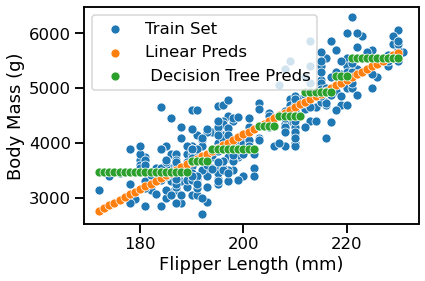

In [19]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

#print(target_train)
#print(data_train["Flipper Length (mm)"])

sns.scatterplot(x=data_train["Flipper Length (mm)"], y=target_train, label="Train Set")
sns.scatterplot(x=data_test["Flipper Length (mm)"], y=lin_pred, label="Linear Preds")
sns.scatterplot(x=data_test["Flipper Length (mm)"], y=dt_pred, label=" Decision Tree Preds")


Now, we will check the extrapolation capabilities of each model. Create a
dataset containing the value of your previous dataset. Besides, add values
below and above the minimum and the maximum of the flipper length seen
during training.

In [26]:
# Write your code here.
data_test2 = pd.DataFrame(np.arange(data_train[data_columns[0]].min()-1750,
                                   data_train[data_columns[0]].max())+1750,
                         columns=data_columns)

dt_pred2 = dt_mod.predict(data_test2)
lin_pred2 = lin_mod.predict(data_test2)

Finally, make predictions with both model on this new testing set. Repeat
the plotting of the previous exercise.

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

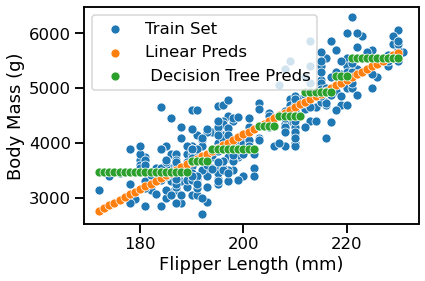

In [27]:
# Write your code here.

sns.scatterplot(x=data_train["Flipper Length (mm)"], y=target_train, label="Train Set")
sns.scatterplot(x=data_test["Flipper Length (mm)"], y=lin_pred, label="Linear Preds")
sns.scatterplot(x=data_test["Flipper Length (mm)"], y=dt_pred, label=" Decision Tree Preds")
